# DKRZ jupyterhub environment helpers
- some hints for using the ENES summer school environment

## Conda python environments
- most notebooks work with the default "Python3" kernel
- info on creating own kernels is available at [DKRZ jupyter kernels](https://docs.dkrz.de/doc/software%26services/jupyterhub/kernels.html) 

- a pre configured environment is available, you can install it by following these steps:
   - get source:  
         - cd summer-school-2022
   - init conda: 
         - conda init bash
         - source ~/.bashrc
   - create conda env: 
         - mamba env create
         - conda activate summerschool_2022
   - make kernel: 
         - python -m ipykernel install --user --name "summerschool_2022" --display-name="summerschool_2022"
   - open notebooks in jupyter and choose kernel "summerschool_2022      

## Dask dashboard

- use the following cell to set the appropriate dask dashboard link
- copy the generated proxy link into the jupyter-hub dask extension window

In [1]:
# set the correct status link for dashboard
import dask
from dask.distributed import Client

dask.config.config.get('distributed').get('dashboard').update({'link':'{JUPYTERHUB_SERVICE_PREFIX}/proxy/{port}/status'})

### show representation of dask graph
- needs python-graphviz and graphviz executable on system Path

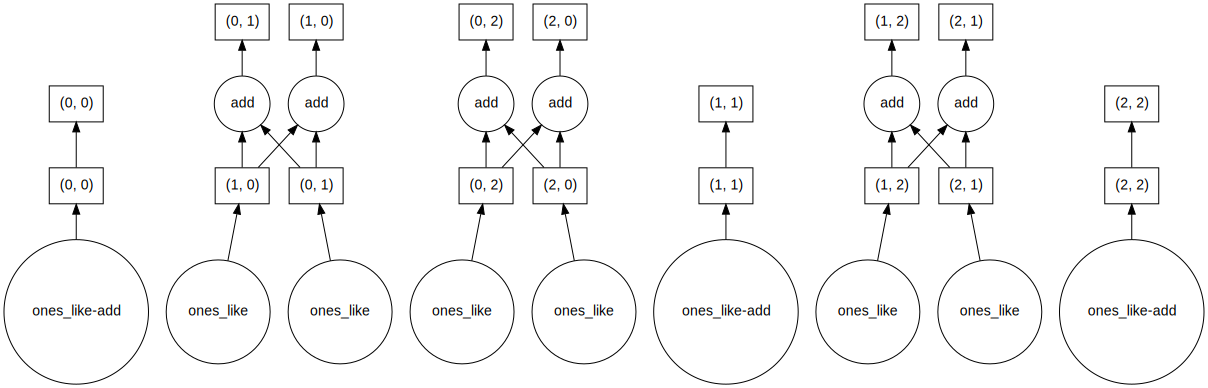

In [6]:
import dask.array as da
x = da.ones((15, 15), chunks=(5, 5))

y = x + x.T

# visualize the low level Dask graph after optimizations
y.visualize(filename="transpose_opt.svg", optimize_graph=True)

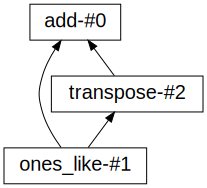

In [4]:
# make sure to modify path settings before (see below)
import dask.array as da
x = da.ones((15, 15), chunks=(5, 5))
y = x + x.T

# visualize the high level Dask graph
y.dask.visualize(filename='transpose-hlg.svg')

In [5]:
import dask.array as da
x = da.ones((15, 15), chunks=(5, 5))
y = x + x.T

y.dask  # shows the HTML representation in a Jupyter notebook

HighLevelGraph with 3 layers.
<dask.highlevelgraph.HighLevelGraph object at 0x7ffed47104f0>
 0. ones_like-509bc39614b4d3ff010446326b8934c3
 1. transpose-5dd8653b94d733ec33e8ae401287b8bc
 2. add-ad9c921c62829e736f6f5675a1b8ef80

## Modify PATH settings for juypter environment

In [3]:
# Some necessary steps when using a custom conda environment with pyproj and CDO installed
import conda, os
conda_file_dir = conda.__file__
conda_dir = conda_file_dir.split('lib')[0]
proj_lib = os.path.join(os.path.join(conda_dir, 'share'), 'proj')
os.environ["PROJ_LIB"] = proj_lib
os.environ['PATH'] += os.pathsep + os.path.join(conda_dir, 'bin')

## Some references

DKRZ specific help:
- DKRZ documentation: https://docs.dkrz.de/
- tutorials and use cases: https://tutorials.dkrz.de/ 

recommended Git repositories to clone
- summer school notebooks: https://github.com/IS-ENES-Data/summer-school-2022 
- xarray tutorial:  https://github.com/xarray-contrib/xarray-tutorial 
- dask tutorial: https://github.com/dask/dask-tutorial 
- GFDL AWS cmip6 examples: https://github.com/aradhakrishnanGFDL/gfdl-aws-analysis.git 
- NCI cmip examples: https://github.com/NCI-data-analysis-platform/climate-cmip.git 
- Pangeo CMIP6 gallery examples: https://github.com/pangeo-gallery/cmip6.git 


Some general references worth looking at : 

- An introduction to earth and environmental science: https://earth-env-data-science.github.io/intro.html 
- University Oslo climate data tutorial:  https://metos-uio.github.io/GEO4962/
- A community platform for Big Data geoscience: https://pangeo.io/ 